In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("C:\\Users\\alper\\Desktop\\dataset\\title.basics.tsv\\data.tsv", delimiter='\t', encoding='utf-8', low_memory=False)

In [4]:
df1.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [5]:
df2 = pd.read_csv("C:\\Users\\alper\\Desktop\dataset\\title.ratings.tsv\\data.tsv", delimiter='\t', encoding='utf-8')

In [6]:
df2.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2011
1,tt0000002,5.7,271
2,tt0000003,6.5,1931
3,tt0000004,5.4,179
4,tt0000005,6.2,2702


In [7]:
merged_data = pd.merge(df1, df2, on='tconst')

In [8]:
merged_data.head()


"ADDED"
merged_data.to_csv('old_data.csv', index=False)


In [9]:
filtered_data = merged_data[merged_data['titleType'] == 'movie']

In [10]:
filtered_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,207
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,489
333,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.1,15
365,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,861
373,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.0,21


In [11]:
merged_data['startYear'] = pd.to_numeric(merged_data['startYear'], errors='coerce')

In [12]:
filtered_data = merged_data[(merged_data['titleType'] == 'movie') & (merged_data['startYear'].notna()) & (merged_data['startYear'] >= 1990)]

In [13]:
filtered_data['startYear'] = filtered_data['startYear'].astype(int, errors='ignore')

C:\Users\alper\AppData\Local\Temp\ipykernel_28980\1469973035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['startYear'] = filtered_data['startYear'].astype(int, errors='ignore')


In [14]:
filtered_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
3592,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,\N,94,Documentary,6.8,62
4267,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N,5.2,16
4382,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",6.1,27
12138,tt0028248,movie,Shipmates o' Mine,Shipmates o' Mine,0,2022,\N,87,Musical,4.2,42
17995,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,88220


In [15]:
filtered_data.drop(['primaryTitle', 'endYear', 'runtimeMinutes'], axis=1, inplace=True)


C:\Users\alper\AppData\Local\Temp\ipykernel_28980\826935957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['primaryTitle', 'endYear', 'runtimeMinutes'], axis=1, inplace=True)


In [16]:
filtered_data.head()

,tconst,titleType,originalTitle,isAdult,startYear,genres,averageRating,numVotes
3592,tt0013274,movie,Istoriya grazhdanskoy voyny,0,2021,Documentary,6.8,62
4267,tt0015414,movie,La tierra de los toros,0,2000,\N,5.2,16
4382,tt0015724,movie,Dama de noche,0,1993,"Drama,Mystery,Romance",6.1,27
12138,tt0028248,movie,Shipmates o' Mine,0,2022,Musical,4.2,42
17995,tt0035423,movie,Kate & Leopold,0,2001,"Comedy,Fantasy,Romance",6.4,88220


In [17]:
filtered_data = filtered_data[filtered_data['genres'] != '\\N']


In [18]:
filtered_data.head()

,tconst,titleType,originalTitle,isAdult,startYear,genres,averageRating,numVotes
3592,tt0013274,movie,Istoriya grazhdanskoy voyny,0,2021,Documentary,6.8,62
4382,tt0015724,movie,Dama de noche,0,1993,"Drama,Mystery,Romance",6.1,27
12138,tt0028248,movie,Shipmates o' Mine,0,2022,Musical,4.2,42
17995,tt0035423,movie,Kate & Leopold,0,2001,"Comedy,Fantasy,Romance",6.4,88220
20190,tt0038086,movie,Shiva und die Galgenblume,0,1993,Thriller,7.0,27


In [19]:
print(filtered_data.describe())

           startYear  averageRating      numVotes
count  195730.000000  195730.000000  1.957300e+05
mean     2011.228171       6.231161  4.731642e+03
std         8.649882       1.469142  4.187822e+04
min      1990.000000       1.000000  5.000000e+00
25%      2006.000000       5.300000  2.000000e+01
50%      2013.000000       6.400000  7.300000e+01
75%      2018.000000       7.200000  4.010000e+02
max      2023.000000      10.000000  2.832685e+06


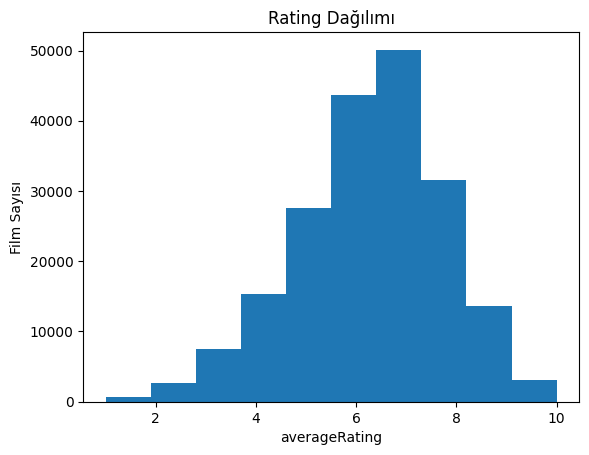

In [20]:
# Rating dağılımını görselleştir
plt.hist(filtered_data['averageRating'])
plt.xlabel('averageRating')
plt.ylabel('Film Sayısı')
plt.title('Rating Dağılımı')
plt.show()


In [21]:
kategori_counts = filtered_data['genres'].value_counts()
print(kategori_counts)
print(filtered_data.head())


genres
Drama                             32703
Documentary                       29313
Comedy                            14393
Comedy,Drama                       7153
Horror                             6090
                                  ...  
Documentary,Talk-Show,Thriller        1
Animation,Biography,Music             1
Documentary,Horror,Music              1
Animation,History,Musical             1
Action,Documentary,Mystery            1
Name: count, Length: 1110, dtype: int64
          tconst titleType                originalTitle isAdult  startYear  \
3592   tt0013274     movie  Istoriya grazhdanskoy voyny       0       2021   
4382   tt0015724     movie                Dama de noche       0       1993   
12138  tt0028248     movie            Shipmates o' Mine       0       2022   
17995  tt0035423     movie               Kate & Leopold       0       2001   
20190  tt0038086     movie    Shiva und die Galgenblume       0       1993   

                       genres  averageRating

In [22]:
"REMOVED"
#correlation_matrix = filtered_data.corr()
#print(correlation_matrix)

"ADDED"
# AFTER
# 7 and 8th items
temp_df = filtered_data.iloc[:, [4,6,7]]
print(temp_df.head())

# Add year into corr.

# Min-Max normalization process 

# Scales each element between 0 and 1 by dividing it by the range of values ​​for that column.
normalized_df = (temp_df - temp_df.min()) / (temp_df.max() - temp_df.min()) 

# scaling between -1 and 1 
normalized_df = 2 * normalized_df - 1

print(normalized_df)

correlation_matrix = normalized_df.corr()
print(correlation_matrix.head())


       startYear  averageRating  numVotes
3592        2021            6.8        62
4382        1993            6.1        27
12138       2022            4.2        42
17995       2001            6.4     88220
20190       1993            7.0        27
         startYear  averageRating  numVotes
3592      0.878788       0.288889 -0.999960
4382     -0.818182       0.133333 -0.999984
12138     0.939394      -0.288889 -0.999974
17995    -0.333333       0.200000 -0.937716
20190    -0.818182       0.333333 -0.999984
...            ...            ...       ...
1382882   0.818182       0.066667 -0.998974
1382886   0.818182       0.200000 -0.996015
1382891   0.757576      -0.444444 -0.999992
1382897   0.757576       0.688889 -0.999999
1382910   0.636364       0.466667 -0.999996

[195730 rows x 3 columns]
               startYear  averageRating  numVotes
startYear       1.000000       0.062970 -0.033978
averageRating   0.062970       1.000000  0.056019
numVotes       -0.033978       0.056019  1.

In [23]:
filtered_data.isnull().sum()

tconst           0
titleType        0
originalTitle    0
isAdult          0
startYear        0
genres           0
averageRating    0
numVotes         0
dtype: int64

In [24]:
"REMOVED"
#filtered_data = pd.get_dummies(filtered_data, columns=['genres'])

'REMOVED'

In [25]:
# df, değiştirdiğiniz DataFrame'in adı olsun

filtered_data.to_csv('new_data.csv', index=False)
print(filtered_data.head())

          tconst titleType                originalTitle isAdult  startYear  \
3592   tt0013274     movie  Istoriya grazhdanskoy voyny       0       2021   
4382   tt0015724     movie                Dama de noche       0       1993   
12138  tt0028248     movie            Shipmates o' Mine       0       2022   
17995  tt0035423     movie               Kate & Leopold       0       2001   
20190  tt0038086     movie    Shiva und die Galgenblume       0       1993   

                       genres  averageRating  numVotes  
3592              Documentary            6.8        62  
4382    Drama,Mystery,Romance            6.1        27  
12138                 Musical            4.2        42  
17995  Comedy,Fantasy,Romance            6.4     88220  
20190                Thriller            7.0        27  
